<a href="https://colab.research.google.com/github/01SakuraAyane29/Machine-Learning-Models/blob/master/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kc_house_data.csv to kc_house_data.csv
User uploaded file "kc_house_data.csv" with length 2515206 bytes


In [0]:
import time
import datetime

data = pd.read_csv('kc_house_data.csv',sep=',')
y_data = data['price']
x_data = data.drop(columns = ['id','date','price'])

date = data['date']

date = date.apply(lambda x: time.strptime(x[2:4]+x[4:6]+x[6:8], '%y%m%d'))

date = date.apply(lambda x: (time.mktime(datetime.datetime.now().timetuple())
                             -time.mktime(x))/86400)

x_data.insert(1,'date',date)


In [0]:
data = pd.read_csv('kc_house_data.csv',sep=',')
cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
sns.pairplot(data[cols],size=5)
plt.tight_layout()
plt.show()


In [0]:
corr = data.corr()
corr['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

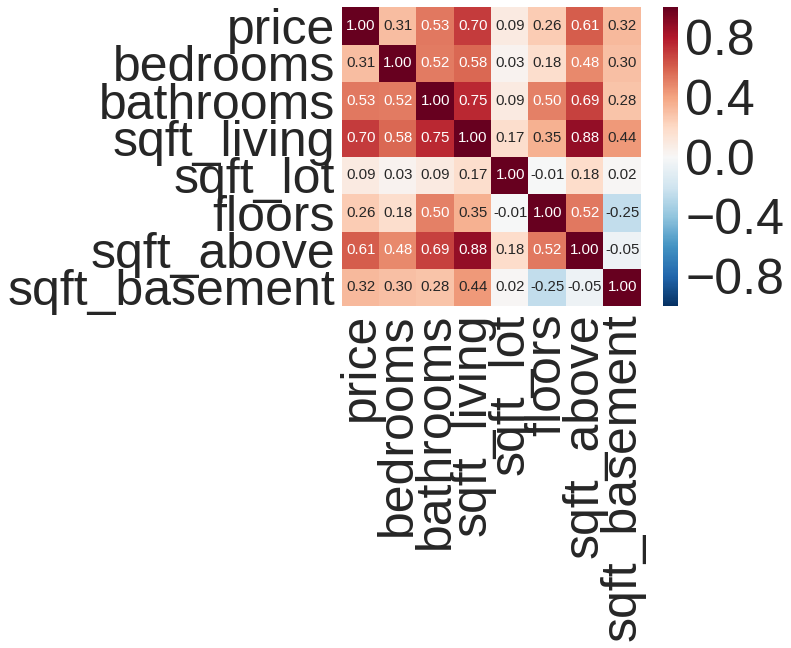

In [0]:
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

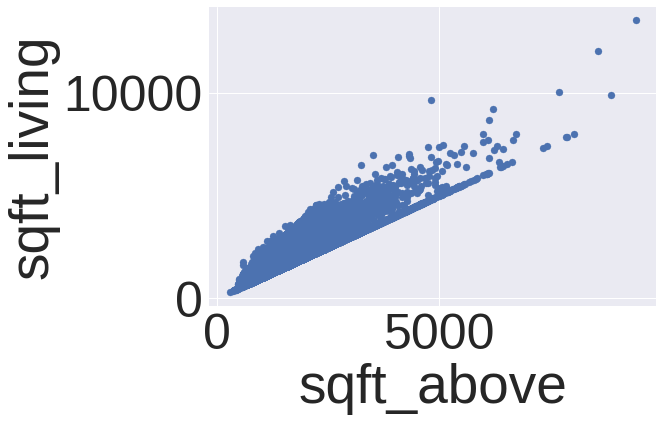

In [0]:
plt.scatter(data['sqft_above'],data['sqft_living'])
plt.xlabel('sqft_above')
plt.ylabel('sqft_living')
plt.show()

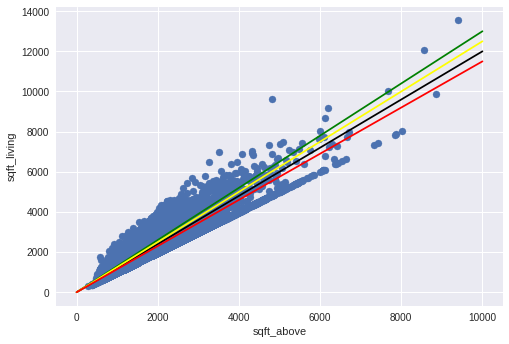

In [0]:
plt.scatter(data['sqft_above'],data['sqft_living'])
plt.xlabel('sqft_above')
plt.ylabel('sqft_living')
colors = ['green','black','yellow','red']
coefs = [1.3,1.2,1.25,1.15]
X = np.linspace(0,10000,100)
for color,coef in zip(colors,coefs):
  Y = coef*X
  plt.plot(X,Y,color = color)

plt.show()

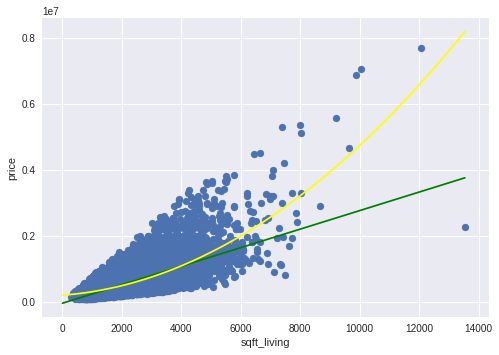

In [0]:
pf1 = sp.polyfit(data['sqft_living'],data['price'],1)
pf2 = sp.polyfit(data['sqft_living'],data['price'],2)
f1 = sp.poly1d(pf1)
f2 = sp.poly1d(pf2)
x = sp.linspace(0,max(data['sqft_living']),100)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(x,f1(x),color = 'green')
plt.plot(x,f2(x),color='yellow')
plt.scatter(data['sqft_living'],data['price'])
plt.show()

In [0]:
frames = [data['bedrooms'],data['bathrooms'],data['sqft_living']]
td = pd.concat(frames,axis =1 )
tda=td.iloc[0].reshape(1,-1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from sklearn import neighbors
clf = neighbors.RadiusNeighborsClassifier()
clf.fit(td,data['price'])
clf.predict(tda)

array([425000.])

Text(0.5,0,u'sqft_above')

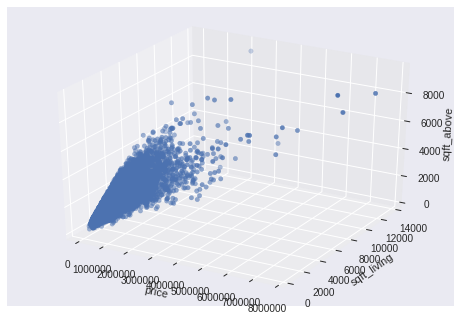

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data['price'],data['sqft_living'],data['sqft_above'])
ax.set_xlabel('price')
ax.set_ylabel('sqft_living')
ax.set_zlabel('sqft_above')


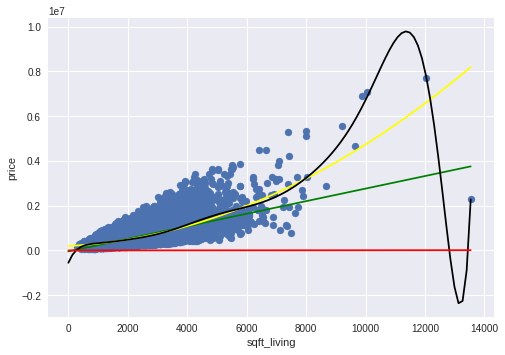

In [0]:
pf1 = sp.polyfit(data['sqft_living'],data['price'],1)
pf2 = sp.polyfit(data['sqft_living'],data['price'],2)
pf3 = sp.polyfit(data['sqft_living'],data['price'],11)
f1 = sp.poly1d(pf1)
f2 = sp.poly1d(pf2)
f3 = sp.poly1d(pf3)
x = sp.linspace(0,max(data['sqft_living']),100)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(x,f1(x),color = 'green')
plt.plot(x,f2(x),color='yellow')
plt.plot(x,f3(x),color = 'black')
plt.plot(x,0.8*x,color = 'red')
plt.scatter(data['sqft_living'],data['price'])
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


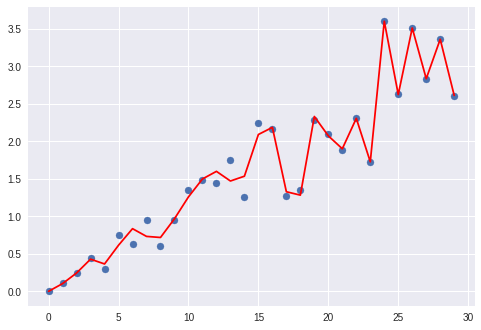

In [0]:
import random as ran
y = []
for i in range(30):
  y.append(0.015*ran.randint(5,10)*i)

pf = sp.polyfit(range(30),y,50)
fx = sp.poly1d(pf)
plt.scatter(range(30),y)
plt.plot(range(30),fx(range(30)),color='red')
plt.show()

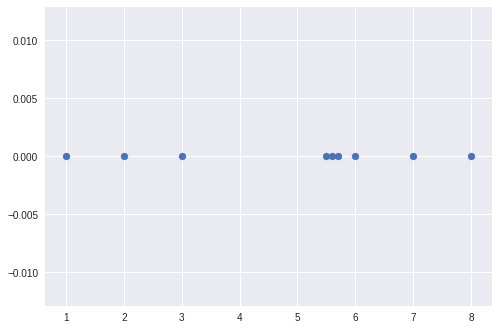

In [0]:
x = [1,2,3,5.5,5.6,5.7,6,7,8]
y = [0,0,0,0,0,0,0,0,0]
plt.scatter(x,y)
plt.show()

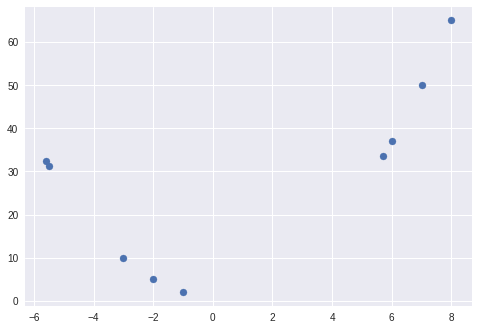

In [0]:
x = [-1,-2,-3,-5.5,-5.6,5.7,6,7,8]
y = [2,5,10,31.25,32.36,33.49,37,50,65]
plt.scatter(x,y)
plt.show()

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138

from sklearn.model_selection import train_test_split

x_data.dropna(axis = 0)
y_data.dropna(axis = 0)

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns =['price']), data['price'], test_size=0.33, random_state=42)


#x_train.dropna(subset = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms'])
  
frames = [x_train['sqft_living'],x_train['grade'],x_train['sqft_above'],x_train['sqft_living'],x_train['bathrooms']]

x_train = pd.concat(frames,axis =1 )

In [0]:
from sk‘learn.model_selection import train_test_split

x_data.dropna(axis = 0)
y_data.dropna(axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)


#x_train.dropna(subset = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms'])
  
frames = [x_train['sqft_living'],x_train['grade'],x_train['sqft_above'],x_train['sqft_living'],x_train['bathrooms']]

x_train = pd.concat(frames,axis =1 )


In [0]:
from sklearn.model_selection import train_test_split

x_data.dropna(axis = 0)
y_data.dropna(axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

In [0]:
from sklearn import svm
my_model = svm.SVR()
my_model.get_params().keys()


['kernel',
 'C',
 'verbose',
 'degree',
 'epsilon',
 'shrinking',
 'max_iter',
 'tol',
 'cache_size',
 'coef0',
 'gamma']

In [0]:
predicted_price = my_model.predict(x_train.iloc[0].values.reshape(1,-1))
print(y_train.iloc[0])
print(predicted_price)

840000.0
[450012.50682425]


In [0]:
print(my_model.score(x_train,y_train)

-0.06046288127895316


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = my_model, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print('Cross validation scores: %s' % scores)
print('Cross validation : %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))

Cross validation scores: [-0.06056059 -0.05753366 -0.05855186 -0.05872786 -0.06549756]
Cross validation : -0.0602 +/- 0.0028


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVR

grid_x_train = x_train.copy()
grid_y_train = y_train.copy().values.reshape(-1,1)

scaler = MaxAbsScaler()

grid_y_train = scaler.fit_transform(grid_y_train)

pipe_svr = make_pipeline(MaxAbsScaler(),
                        SVR()) 

param_range = [0.0001,0.001,0.01,0.1,
              1.0,10.0,100.0,1000.0]


param_grid = {'svr__C':param_range,
             'svr__epsilon':param_range,
              'svr__gamma':param_range,
             'svr__kernel':['rbf']}
gs = GridSearchCV(estimator = pipe_svr,
                 param_grid = param_grid,
                 scoring = 'neg_mean_absolute_error',
                 cv = 5,
                 n_jobs= -1)
gs = gs.fit(grid_x_train,grid_y_train.ravel())
print(gs.best_score_)
print(gs.best_params_)

In [0]:
pr = scaler.inverse_transform(0.013274466846651263)
print(pr)

[[102213.39471921]]


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
copy_x_train = scaler.fit_transform(x_train)
print(copy_x_train)

[[ 0.57667448 -0.55719543 -0.20191596  0.57667448  0.83118185]
 [ 0.07065714  0.29585911  0.42733499  0.07065714  0.504857  ]
 [-0.38035832 -0.55719543 -0.97637867 -0.38035832 -0.47411756]
 ...
 [ 0.04865638 -0.55719543  0.40313303  0.04865638  0.504857  ]
 [-1.86540922 -2.2633045  -1.70243745 -1.86540922 -1.77941697]
 [ 1.15969446 -0.55719543  1.62533198  1.15969446  0.504857  ]]


In [0]:
copy_y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
from sklearn import svm
my_model = svm.SVR(kernel = 'rbf')
my_model.fit(copy_x_train,copy_y_train)
print(my_model.score(copy_x_train,copy_y_train))

0.5819556964635355


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = my_model, X = copy_x_train, y = copy_y_train, cv = 5, n_jobs = -1)
print('Cross validation scores: %s' % scores)
print('Cross validation : %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))

Cross validation scores: [0.51744413 0.52639859 0.58227875 0.5895592  0.58484516]
Cross validation : 0.5601 +/- 0.0314


In [0]:
from sklearn.feature_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

my_model = svm.SVR(kernel = 'rbf')

scaler = StandardScaler()


training_scores = []
validation_scores = []
scores = []
abs_validation_scores = []

selection_x = x_data.copy()
selection_y = y_data.copy().values.reshape(-1,1)

selection_x = scaler.fit_transform(selection_x)
selection_y = scaler.fit_transform(selection_y)


for selector in [SelectKBest(f_regression, k = 5),SelectKBest(f_regression),
                 SelectPercentile(f_regression),SelectFpr(f_regression),SelectFdr(f_regression)]:
  loop_x = selection_x.copy()
  loop_y = selection_y.copy()
  loop_x = selector.fit_transform(loop_x, loop_y)
  my_model.fit(loop_x,loop_y)
  training_scores.append(my_model.score(loop_x, loop_y))
  abs_validation_scores = np.asarray(cross_val_score(estimator = my_model, X = loop_x, y = loop_y, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
  abs_mean = -np.mean(abs_validation_scores)
  abs_mean = np.asarray(abs_mean)
  scores.append(scaler.inverse_transform(abs_mean.reshape(-1,1)))
  abs_validation_scores =[]

print(training_scores)

print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.6069432023069021, 0.7523169583367729, 0.5592788348878526, 0.8192489664856245, 0.8192489664856245]
[array([[683520.82209773]]), array([[637114.10071311]]), array([[690537.11775542]]), array([[621868.86948267]]), array([[621868.86948267]])]


In [0]:
selector = SelectFdr(f_regression)
tx = selection_x.copy()
ty = selection_y.copy()
tx = selector.fit_transform(tx,ty)
print(tx.shape)

svr = svm.SVR()
svr.fit(tx,ty)
print(svr.predict(tx))

(21613, 18)
[-0.7826424   0.16498968 -0.33415329 ... -0.5868251  -0.26291393
 -0.59128107]


In [0]:
print(scaler.inverse_transform(ty))

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


In [0]:
print(scaler.inverse_transform(svr.predict(tx)))

[252765.47819362 600658.94067829 417414.22066709 ... 324653.67238051
 443567.51985865 323017.80323305]


In [0]:
from sklearn.feature_selection import SelectFpr
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.preprocessing import Imputer

selector = SelectFpr(f_regression)

my_model = svm.SVR(kernel = 'rbf')

scaler = StandardScaler()

imp = Imputer(missing_values=0, strategy='mean', axis=0)

zero_x_train = x_train.copy()
zero_y_train = y_train.copy().values.reshape(-1,1)

zero_x_train = imp.fit_transform(zero_x_train,zero_y_train)

zero_x_train = scaler.fit_transform(zero_x_train)
zero_y_train = scaler.fit_transform(zero_y_train)

zero_x_train = selector.fit_transform(zero_x_train,zero_y_train)

my_model.fit(zero_x_train,zero_y_train)

abs_validation_score =  np.asarray(cross_val_score(estimator = my_model,
                                                   X = zero_x_train, y = zero_y_train, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
r2_validation_score = cross_val_score(estimator = my_model,
                                      X = zero_x_train, y = zero_y_train, cv = 5, n_jobs = -1,scoring = 'r2')

abs_mean = -np.mean(abs_validation_score)
abs_mean = np.asarray(abs_mean)

r2_mean = np.mean(r2_validation_score)

print('training score: %.4f' % my_model.score(zero_x_train,zero_y_train))
print('R2 validation score: %.4f' % r2_mean)
print('rescaled abs error: %.4f' % scaler.inverse_transform(abs_mean.reshape(-1,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_select

training score: 0.8111
R2 validation score: 0.7518
rescaled abs error: 621712.1263


In [0]:
from sklearn.feature_selection import SelectFpr
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.preprocessing import Imputer

selector = SelectFpr(f_regression)

my_model = svm.SVR(kernel = 'rbf')

scaler = StandardScaler()

imp = Imputer(missing_values=0, strategy='mean', axis=0)

zero_x_train = x_train.copy()
zero_y_train = y_train.copy().values.reshape(-1,1)

zero_x_train = imp.fit_transform(zero_x_train,zero_y_train)

zero_x_train = scaler.fit_transform(zero_x_train)
zero_y_train = scaler.fit_transform(zero_y_train)

zero_x_train = selector.fit_transform(zero_x_train,zero_y_train)

my_model.fit(zero_x_train,zero_y_train)

validation_score =  np.asarray(cross_val_score(estimator = my_model, 
                                               X = zero_x_train, y = zero_y_train, cv = 5, 
                                               n_jobs = -1,scoring = 'neg_mean_absolute_error'))

mean = -np.mean(validation_score)

mean = np.asarray(mean)

print('training score: %.4f' % my_model.score(zero_x_train,zero_y_train))
print('validation score: %.4f' % (-np.mean(validation_score)))
print('rescaled validation error: %.4f' % scaler.inverse_transform(mean.reshape(-1,1)))

training score: 0.8111
validation score: 0.2351
rescaled validation error: 621712.1263


In [0]:
from sklearn.feature_selection import SelectFpr,f_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import svm

selector = SelectFpr(score_func=f_regression)

my_model = svm.SVR(kernel = 'rbf')

scaler = RobustScaler()

robust_x_train = x_train.copy()
robust_y_train = y_train.copy().values.reshape(-1,1)

robust_x_train = scaler.fit_transform(robust_x_train)
robust_y_train = scaler.fit_transform(robust_y_train)

robust_x_train = selector.fit_transform(robust_x_train,robust_y_train)

my_model.fit(robust_x_train,robust_y_train)

abs_validation_score =  np.asarray(cross_val_score(estimator = my_model,
                                                   X = robust_x_train, y = robust_y_train, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
r2_validation_score = cross_val_score(estimator = my_model,
                                      X = robust_x_train, y = robust_y_train, cv = 5, n_jobs = -1,scoring = 'r2')

abs_mean = -np.mean(abs_validation_score)
abs_mean = np.asarray(abs_mean)

r2_mean = np.mean(r2_validation_score)

print('training score: %.4f' % my_model.score(robust_x_train,robust_y_train))
print('R2 validation score: %.4f' % r2_mean)
print('rescaled abs error: %.4f' % scaler.inverse_transform(abs_mean.reshape(-1,1)))

training score: 0.7796
R2 validation score: 0.7140
rescaled abs error: 542296.3251


In [0]:
from sklearn.feature_selection import SelectFpr,f_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn import svm

selector = SelectFpr(score_func=f_regression)

my_model = svm.SVR(kernel = 'rbf',C = 100.0, gamma = 0.01, epsilon = 0.0001)

scaler = MaxAbsScaler()

max_x_train = x_train.copy()



max_y_train = y_train.copy().values.reshape(-1,1)

max_x_train = scaler.fit_transform(max_x_train)
max_y_train = scaler.fit_transform(max_y_train)

max_y_train = max_y_train.reshape(-1,1)

max_x_train = selector.fit_transform(max_x_train,max_y_train)

my_model.fit(max_x_train,max_y_train.ravel())

abs_validation_score =  np.asarray(cross_val_score(estimator = my_model,
                                                   X = max_x_train, y = max_y_train.ravel(), cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
abs_mean = -np.mean(abs_validation_score)
abs_mean = np.asarray(abs_mean)

print('training score: %.4f' % my_model.score(max_x_train,max_y_train))
print('rescaled abs error: %.4f' % scaler.inverse_transform(abs_mean.reshape(-1,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training score: 0.7521
rescaled abs error: 107548.7298


In [0]:
from sklearn.feature_selection import SelectFpr,f_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn import svm

selector = SelectFpr(score_func=f_regression)

my_model = svm.SVR(kernel = 'rbf',C = 1000.0, epsilon = 0.0001)

scaler = MaxAbsScaler()

max_x_train = x_train.copy()
max_y_train = y_train.copy().values.reshape(-1,1)

max_x_train = scaler.fit_transform(max_x_train)

max_x_train = selector.fit_transform(max_x_train,max_y_train)

my_model.fit(max_x_train,max_y_train)

abs_validation_score =  np.asarray(cross_val_score(estimator = my_model,
                                                   X = max_x_train, y = max_y_train, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))

abs_mean = -np.mean(abs_validation_score)
abs_mean = np.asarray(abs_mean)

print('training score: %.4f' % my_model.score(max_x_train,max_y_train))
print('abs error: %.4f' % abs_mean)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training score: 0.0816
abs error: 205142.5078


In [0]:
from sklearn.decomposition import *
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

pca = PCA()

my_model = svm.SVR(kernel = 'rbf')

scaler = StandardScaler()

pca_x_train = x_train.copy()
pca_y_train = y_train.copy().values.reshape(-1,1)

pca_x_train = pca.fit_transform(pca_x_train)

pca_x_train = scaler.fit_transform(pca_x_train)
pca_y_train = scaler.fit_transform(pca_y_train)

my_model.fit(pca_x_train,pca_y_train)

abs_validation_score =  np.asarray(cross_val_score(estimator = my_model,
                                                   X = pca_x_train, y = pca_y_train, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
r2_validation_score = cross_val_score(estimator = my_model, 
                                      X = pca_x_train, y = pca_y_train, cv = 5, n_jobs = -1,scoring = 'r2')

abs_mean = -np.mean(abs_validation_score)
abs_mean = np.asarray(abs_mean)

r2_mean = np.mean(r2_validation_score)

print('training score: %.4f' % my_model.score(pca_x_train,pca_y_train))
print('R2 validation score: %.4f' % r2_mean)
print('rescaled abs error: %.4f' % scaler.inverse_transform(abs_mean.reshape(-1,1)))

training score: 0.8058
R2 validation score: 0.7310
rescaled abs error: 624550.4205
